# Estadística poblacional de las palabras

En esta notebook, veremos algunas estadísticas básicas del dataset

In [13]:
%pylab inline
%load_ext autoreload
%autoreload 2
import pandas as pd

df = pd.read_csv("csv/cantidadesTotalesOrdenada.csv", index_col=0)


Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/jmperez/.pyenv/versions/2.7.12/envs/tesis-damian/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['entropy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
import re
from scipy.stats import entropy
cant_palabras = [c for c in df.columns if re.match(r'.*Palabras$', c)]
cant_personas = [c for c in df.columns if re.match(r'.*Usuarios$', c)]

df["cant_provincias"] = (df[cant_palabras] > 0).sum(axis=1)
df["entropy_palabras"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["entropy_personas"] = df[cant_personas].apply(entropy, axis=1, raw=True)

## Plot "3d" usuarios, ocurrencias -> entropía

Acá vemos cuáles son las palabras que queremos encontrar: las que están en "rojo", aunque con cierto nivel de uso...

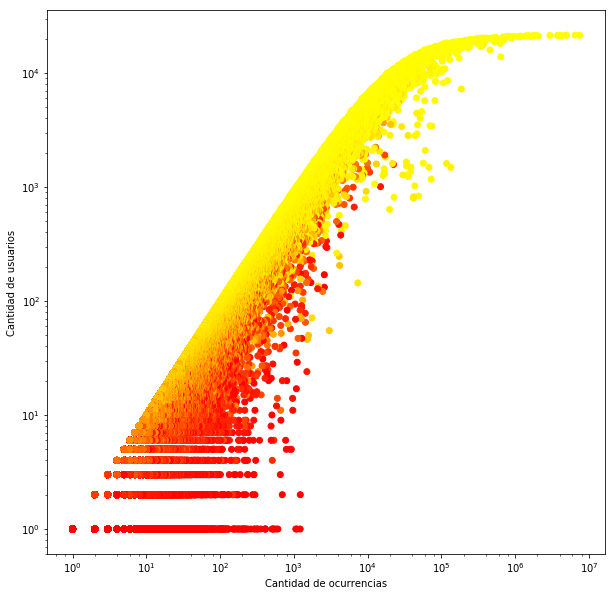

In [12]:
plt.rcParams["figure.figsize"] = (10, 10)

scatter(df["cantPalabra"], df["cantUsuariosTotal"], 
        c=df["entropy_palabras"], cmap=plt.cm.autumn)
plt.xlabel("Cantidad de ocurrencias")
plt.ylabel("Cantidad de usuarios")
plt.semilogx();
plt.semilogy();

## Cantidad de palabras acumulada según cantidad de usuarios/ocurrencias

[]

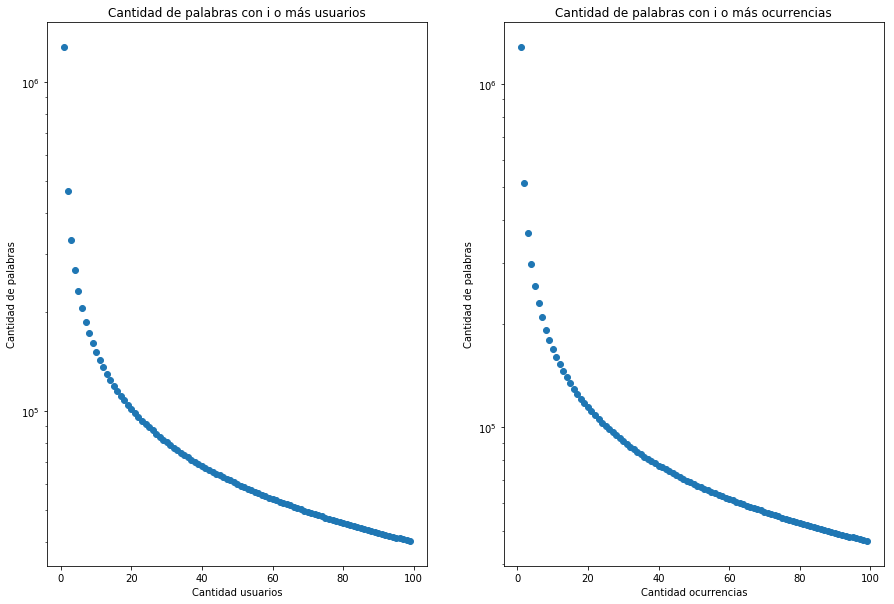

In [19]:
plt.rcParams["figure.figsize"] = (15, 10)
X = []
for i in range(1, 100):
    X.append((df.cantUsuariosTotal >= i).sum())

plt.subplot(1,2,1)
scatter(range(1, 100), X)
plt.title(u"Cantidad de palabras con i o más usuarios")
plt.xlabel("Cantidad usuarios")
plt.ylabel("Cantidad de palabras")

plt.semilogy()

X = []
for i in range(1, 100):
    X.append((df.cantPalabra >= i).sum())
    
plt.subplot(1,2,2)
scatter(range(1, 100), X)
plt.title(u"Cantidad de palabras con i o más ocurrencias")
plt.xlabel("Cantidad ocurrencias")
plt.ylabel("Cantidad de palabras")

plt.semilogy()